In [72]:
# Part4. Hoax Prediction using Logistic Regression and Random Forest

In [56]:
df = pd.read_csv("ufo_reports.csv", sep='\t')
df=df[(~df.Long.isnull()) & (~df.Lat.isnull())]

In [57]:
shapes = pd.get_dummies(df.Shape,prefix='Shape').iloc[:,0:]

In [58]:
# df=pd.concat([df,shapes],axis=1)
cols_to_keep=['Date', 'Year', 'Month', 'Day', 'Time', 'City', 'State', 'Lat', 'Long', 'Shape',
       'Duration_Sec', 'Summary', 'WeekDay', 'Week', 'Quarter', 'TimePer', 'state', 'state abbr', 'Region',
       'Hoax', 'ASTR','HOL', 'Pop', 'Milit_Share']
df = df[cols_to_keep].join(shapes.ix[:, 'Shape_Chevron':])

In [59]:
regions = pd.get_dummies(df.Region,prefix='Region').iloc[:,0:]


In [60]:
cols_to_keep=['Date', 'Year', 'Month', 'Day', 'Time', 'City', 'State', 'Lat', 'Long','Shape',
       'Duration_Sec', 'Summary', 'WeekDay', 'Week', 'Quarter', 'TimePer',
       'state', 'state abbr', 'Region', 'Hoax', 'ASTR','HOL', 'Pop', 'Milit_Share',
       'Shape_Chevron','Shape_Cigar', 'Shape_Circle', 'Shape_Cone', 'Shape_Cross',
       'Shape_Cylinder', 'Shape_Diamond', 'Shape_Disk', 'Shape_Egg',
       'Shape_Fireball', 'Shape_Flash', 'Shape_Formation', 'Shape_Light',
       'Shape_Other', 'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere',
       'Shape_Teardrop', 'Shape_Triangle']
df = df[cols_to_keep].join(regions.ix[:, 'Region_Midwest':])

In [61]:
df.columns
df = df.reset_index()

In [62]:
df_copy = pd.DataFrame(df)
df_copy.set_index('Date',inplace=True)
df_copy.index = pd.to_datetime(df_copy.index, unit='s')
df_copy.head()

,index,Year,Month,Day,Time,City,State,Lat,Long,Shape,...,Shape_Other,Shape_Oval,Shape_Rectangle,Shape_Sphere,Shape_Teardrop,Shape_Triangle,Region_Midwest,Region_Northeast,Region_South,Region_West
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0,2015,12,31,23:59,Eugene,OR,44.052069,-123.086746,Fireball,...,0,0,0,0,0,0,0,0,0,1
2015-12-31,1,2015,12,31,15:00,Monmouth,OR,44.848449,-123.233987,Egg,...,0,0,0,0,0,0,0,0,0,1
2015-12-30,2,2015,12,30,22:00,Portland,OR,45.523447,-122.676207,Light,...,0,0,0,0,0,0,0,0,0,1
2015-12-30,3,2015,12,30,19:30,Springfield,OR,44.046237,-123.022028,Changing,...,0,0,0,0,0,0,0,0,0,1
2015-12-30,4,2015,12,30,16:50,Orient,OR,45.467337,-122.352587,Cylinder,...,0,0,0,0,0,0,0,0,0,1


In [63]:
#astronomical events
ASTR=[
'2014-05-06','2014-01-01','2014-01-02','2014-01-03','2014-01-05','2014-01-16','2014-01-30',
'2014-02-14',
'2014-03-01','2014-03-16','2014-03-20','2014-03-30',
'2014-04-08','2014-04-15','2014-04-23','2014-04-22','2014-04-29',
'2014-05-05','2014-05-10','2014-05-14','2014-05-24','2014-05-28',
'2014-06-07','2014-06-13','2014-06-21','2014-06-27',
'2014-07-12','2014-07-26','2014-07-29','2014-07-28',
'2014-08-10','2014-08-12','2014-08-18','2014-08-25','2014-08-29','2014-08-13',
'2014-09-09','2014-09-23','2014-09-24',
'2014-10-04','2014-10-07','2014-10-08','2014-10-09','2014-10-21','2014-10-20','2014-10-23',
'2014-11-05','2014-11-06','2014-11-17','2014-11-18','2014-11-22',
'2014-12-06','2014-12-13','2014-12-14','2014-12-21','2014-12-22','2014-12-23','2014-12-22',
'2015-01-03','2015-01-04','2015-01-05','2015-01-20',
'2015-02-03','2015-02-06','2015-02-18','2015-02-22','2015-2-024',
'2015-03-05','2015-03-06','2015-03-20',
'2015-04-04','2015-04-13','2015-04-18','2015-04-22','2015-04-23','2015-04-25',
'2015-05-04','2015-05-05','2015-05-06','2015-05-07','2015-05-18','2015-05-23',
'2015-06-02','2015-06-06','2015-06-16','2015-06-21','2015-06-24',
'2015-07-01','2015-07-02','2015-07-14','2015-07-16','2015-07-28','2015-07-29','2015-07-31',
'2015-08-12','2015-08-13','2015-08-14','2015-08-29',
'2015-09-01','2015-09-04','2015-09-13','2015-09-23','2015-09-28',
'2015-10-01','2015-10-08','2015-10-11','2015-10-16','2015-10-13','2015-10-22','2015-10-21','2015-10-26','2015-10-27','2015-10-28',
'2015-11-06','2015-11-05','2015-11-11','2015-11-18','2015-11-17','2015-11-25',
'2015-12-07','2015-12-11','2015-12-13','2015-12-14','2015-12-22','2015-12-21','2015-12-25','2015-12-29'
]

In [64]:
holiday=[
'2014-01-01','2014-01-20','2014-02-17','2014-03-04','2014-03-17','2014-03-09','2014-05-26',
'2014-07-04','2014-09-01','2014-10-13','2014-11-11','2014-11-27','2014-12-25'    
'2015-01-01','2015-01-19','2015-02-16','2015-05-25','2015-07-04','2015-09-07',
'2015-10-12','2015-11-11','2015-11-26','2015-12-25'
]

In [65]:
def MATCH(a, LIST):
    if a in LIST:
        return 1
    else:
        return 0

In [66]:
df=df.reset_index()
df.head(1)
df.columns

Index(['Date', 'index', 'Year', 'Month', 'Day', 'Time', 'City', 'State', 'Lat',
       'Long', 'Shape', 'Duration_Sec', 'Summary', 'WeekDay', 'Week',
       'Quarter', 'TimePer', 'state', 'state abbr', 'Region', 'Hoax', 'ASTR',
       'HOL', 'Pop', 'Milit_Share', 'Shape_Chevron', 'Shape_Cigar',
       'Shape_Circle', 'Shape_Cone', 'Shape_Cross', 'Shape_Cylinder',
       'Shape_Diamond', 'Shape_Disk', 'Shape_Egg', 'Shape_Fireball',
       'Shape_Flash', 'Shape_Formation', 'Shape_Light', 'Shape_Other',
       'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere', 'Shape_Teardrop',
       'Shape_Triangle', 'Region_Midwest', 'Region_Northeast', 'Region_South',
       'Region_West'],
      dtype='object')

In [26]:
# HOAX Prediction

# 1. Logistic Regression

In [27]:
# All features
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
sm.Logit(df['Hoax'],
sm.add_constant(df[['Year', 'Month', 'Day', 'Lat', 'Long',
       'Duration_Sec', 'WeekDay', 'Week', 'Quarter', 'TimePer', 'ASTR', 'Pop','HOL', 'Milit_Share',
       'Shape_Chevron','Shape_Cigar', 'Shape_Circle', 'Shape_Cone', 'Shape_Cross',
       'Shape_Cylinder', 'Shape_Diamond', 'Shape_Disk', 'Shape_Egg',
       'Shape_Fireball', 'Shape_Flash', 'Shape_Formation', 'Shape_Light',
       'Shape_Other', 'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere',
       'Shape_Teardrop', 'Shape_Triangle', 'Region_Midwest','Region_Northeast', 'Region_South']])).fit().summary()


Optimization terminated successfully.
         Current function value: 0.227311
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Hoax   No. Observations:                12172
Model:                          Logit   Df Residuals:                    12135
Method:                           MLE   Df Model:                           36
Date:                Wed, 08 Jun 2016   Pseudo R-squ.:                  0.1112
Time:                        19:03:03   Log-Likelihood:                -2766.8
converged:                       True   LL-Null:                       -3113.0
                                        LLR p-value:                1.993e-122
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const            -1988.9681    162.625    -12.230      0.000     -2307.707 -1670.229
Year                 0.9865      0.081     12.220      0.000         0.828     1.145
Month                0.1725      0.078      2.198      0.028         0.019     0.326
Day                 -0.0146      0.005     -3.139      0.002        -0.024    -0.005
Lat                 -0.0174      0.008     -2.174      0.030        -0.033    -0.002
Long                 0.0018      0.004      0.411      0.681        -0.007     0.010
Duration_Sec      1.565e-05   5.26e-06      2.973      0.003      5.33e-06   2.6e-05
WeekDay              0.0042      0.019      0.217      0.828        -0.034     0.042
Week                 0.0116      0.015      0.781      0.435        -0.018     0.041
Quarter             -0.3344      0.145     -2.302      0.021        -0.619    -0.050
TimePer             -0.0185      0.010     -1.867      0.062        -0.038     0.001
ASTR                -0.2170      0.105     -2.060      0.039        -0.423    -0.011
Pop               1.629e-08   3.23e-09      5.043      0.000      9.96e-09  2.26e-08
HOL                 -0.5963      0.222     -2.682      0.007        -1.032    -0.161
Milit_Share         11.3181      9.657      1.172      0.241        -7.609    30.245
Shape_Chevron       -0.5858      0.366     -1.601      0.109        -1.303     0.131
Shape_Cigar         -0.3963      0.301     -1.317      0.188        -0.986     0.193
Shape_Circle        -0.4180      0.145     -2.891      0.004        -0.701    -0.135
Shape_Cone           1.0318      0.353      2.919      0.004         0.339     1.725
Shape_Cross          1.2484      0.418      2.983      0.003         0.428     2.069
Shape_Cylinder      -0.4175      0.349     -1.195      0.232        -1.102     0.267
Shape_Diamond       -0.2500      0.301     -0.830      0.406        -0.840     0.340
Shape_Disk          -0.4771      0.243     -1.960      0.050        -0.954  7.77e-05
Shape_Egg            0.8685      0.351      2.471      0.013         0.180     1.557
Shape_Fireball      -0.2888      0.151     -1.911      0.056        -0.585     0.007
Shape_Flash         -0.3078      0.263     -1.168      0.243        -0.824     0.209
Shape_Formation     -0.9248      0.278     -3.330      0.001        -1.469    -0.380
Shape_Light         -0.1021      0.119     -0.855      0.393        -0.336     0.132
Shape_Other         -0.1418      0.165     -0.857      0.392        -0.466     0.183
Shape_Oval          -0.8490      0.253     -3.361      0.001        -1.344    -0.354
Shape_Rectangle     -1.6501      0.518     -3.187      0.001        -2.665    -0.635
Shape_Sphere        -0.6276      0.191     -3.281      0.001        -1.002    -0.253
Shape_Teardrop      -0.2266      0.417     -0.544      0.587        -1.043     0.590
Shape_Triangle      -0.7574      0.187     -4.041      0.000        -1.125    -0.390
Region_Midwest      -0.6139      0.166     -3.701      0.000        -0.939    -0.289
Region_Nort

In [28]:
from sklearn.metrics import roc_auc_score
#ROC curve
log_reg = LogisticRegression()
log_reg.fit(df[['Year', 'Month', 'Day', 'Lat', 'Long',
       'Duration_Sec', 'WeekDay', 'Week', 'Quarter', 'TimePer', 'ASTR', 'Pop','HOL', 'Milit_Share',
       'Shape_Chevron','Shape_Cigar', 'Shape_Circle', 'Shape_Cone', 'Shape_Cross',
       'Shape_Cylinder', 'Shape_Diamond', 'Shape_Disk', 'Shape_Egg',
       'Shape_Fireball', 'Shape_Flash', 'Shape_Formation', 'Shape_Light',
       'Shape_Other', 'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere',
       'Shape_Teardrop', 'Shape_Triangle', 'Region_Midwest','Region_Northeast', 'Region_South']], df['Hoax'])

roc_auc_score(df['Hoax'], log_reg.predict(df[[ 'Year', 'Month', 'Day', 'Lat', 'Long',
       'Duration_Sec', 'WeekDay', 'Week', 'Quarter', 'TimePer', 'ASTR', 'Pop','HOL', 'Milit_Share',
       'Shape_Chevron','Shape_Cigar', 'Shape_Circle', 'Shape_Cone', 'Shape_Cross',
       'Shape_Cylinder', 'Shape_Diamond', 'Shape_Disk', 'Shape_Egg',
       'Shape_Fireball', 'Shape_Flash', 'Shape_Formation', 'Shape_Light',
       'Shape_Other', 'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere',
       'Shape_Teardrop', 'Shape_Triangle', 'Region_Midwest','Region_Northeast', 'Region_South']]))

0.5

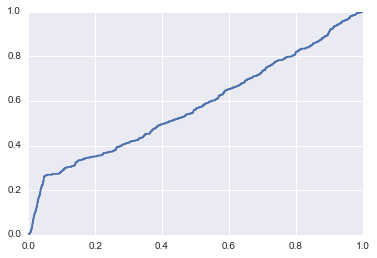

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

actuals = log_reg.predict(df[['Year', 'Month', 'Day', 'Lat', 'Long',
       'Duration_Sec', 'WeekDay', 'Week', 'Quarter', 'TimePer', 'ASTR', 'Pop','HOL', 'Milit_Share',
       'Shape_Chevron','Shape_Cigar', 'Shape_Circle', 'Shape_Cone', 'Shape_Cross',
       'Shape_Cylinder', 'Shape_Diamond', 'Shape_Disk', 'Shape_Egg',
       'Shape_Fireball', 'Shape_Flash', 'Shape_Formation', 'Shape_Light',
       'Shape_Other', 'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere',
       'Shape_Teardrop', 'Shape_Triangle', 'Region_Midwest','Region_Northeast', 'Region_South'
        ]]) 

probas = log_reg.predict_proba(df[['Year', 'Month', 'Day', 'Lat', 'Long',
       'Duration_Sec', 'WeekDay', 'Week', 'Quarter', 'TimePer', 'ASTR', 'Pop','HOL', 'Milit_Share',
       'Shape_Chevron','Shape_Cigar', 'Shape_Circle', 'Shape_Cone', 'Shape_Cross',
       'Shape_Cylinder', 'Shape_Diamond', 'Shape_Disk', 'Shape_Egg',
       'Shape_Fireball', 'Shape_Flash', 'Shape_Formation', 'Shape_Light',
       'Shape_Other', 'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere',
       'Shape_Teardrop', 'Shape_Triangle', 'Region_Midwest','Region_Northeast', 'Region_South' ]])
plt.plot(roc_curve(df[['Hoax']], probas[:,1])[0], roc_curve(df[['Hoax']], probas[:,1])[1])

In [30]:
#reduced to more siginificant features
sm.Logit(df['Hoax'], sm.add_constant(df[['Month', 'Duration_Sec', 'ASTR','HOL']])).fit().summary()

Optimization terminated successfully.
         Current function value: 0.248330
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Hoax   No. Observations:                12172
Model:                          Logit   Df Residuals:                    12167
Method:                           MLE   Df Model:                            4
Date:                Wed, 08 Jun 2016   Pseudo R-squ.:                 0.02901
Time:                        19:03:07   Log-Likelihood:                -3022.7
converged:                       True   LL-Null:                       -3113.0
                                        LLR p-value:                 5.436e-38
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -3.5861      0.105    -34.226      0.000        -3.792    -3.381
Month            0.1407      0.012     11.762      0.000         0.117     0.164
Duration_Sec  1.587e-05   5.74e-06      2.765      0.006      4.62e-06  2.71e-05
ASTR            -0.2318      0.101     -2.292      0.022        -0.430    -0.034
HOL             -0.7448      0.216     -3.450      0.001        -1.168    -0.322
================================================================================
"""

In [31]:
from sklearn.metrics import roc_auc_score
#ROC curve
log_reg = LogisticRegression()
log_reg.fit(df[['Month', 'Duration_Sec', 'ASTR','HOL']], df['Hoax'])

roc_auc_score(df['Hoax'], log_reg.predict(df[[ 'Month', 'Duration_Sec', 'ASTR','HOL']]))

0.49991158267020336

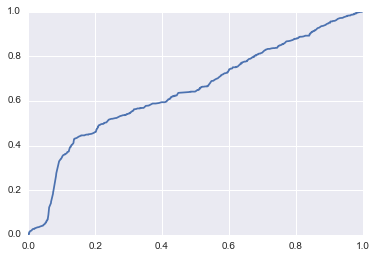

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

actuals = log_reg.predict(df[['Month', 'Duration_Sec', 'ASTR','HOL'
        ]]) 

probas = log_reg.predict_proba(df[['Month', 'Duration_Sec', 'ASTR','HOL' ]])
plt.plot(roc_curve(df[['Hoax']], probas[:,1])[0], roc_curve(df[['Hoax']], probas[:,1])[1])

### - Random Forest 

In [33]:
df = df[(~df.Shape.isnull()) & (~df.Summary.isnull()) ]

In [34]:
df.columns

Index(['Date', 'index', 'Year', 'Month', 'Day', 'Time', 'City', 'State', 'Lat',
       'Long', 'Shape', 'Duration_Sec', 'Summary', 'WeekDay', 'Week',
       'Quarter', 'TimePer', 'state', 'state abbr', 'Region', 'Hoax', 'ASTR',
       'HOL', 'Pop', 'Milit_Share', 'Shape_Chevron', 'Shape_Cigar',
       'Shape_Circle', 'Shape_Cone', 'Shape_Cross', 'Shape_Cylinder',
       'Shape_Diamond', 'Shape_Disk', 'Shape_Egg', 'Shape_Fireball',
       'Shape_Flash', 'Shape_Formation', 'Shape_Light', 'Shape_Other',
       'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere', 'Shape_Teardrop',
       'Shape_Triangle', 'Region_Midwest', 'Region_Northeast', 'Region_South',
       'Region_West'],
      dtype='object')

In [35]:
# All Features
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

X = df[['Year', 'Month', 'Day',  'Lat',
       'Long', 'Duration_Sec', 'WeekDay', 'Week',
       'Quarter', 'TimePer', 'ASTR',
       'HOL', 'Pop', 'Milit_Share', 'Shape_Chevron', 'Shape_Cigar',
       'Shape_Circle', 'Shape_Cone', 'Shape_Cross', 'Shape_Cylinder',
       'Shape_Diamond', 'Shape_Disk', 'Shape_Egg', 'Shape_Fireball',
       'Shape_Flash', 'Shape_Formation', 'Shape_Light', 'Shape_Other',
       'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere', 'Shape_Teardrop',
       'Shape_Triangle', 'Region_Midwest', 'Region_Northeast','Region_West', 'Region_South']]
y = df['Hoax']

score_model={}   
for n_depth in range(1, 5, 1):
    for n_trees in range(1, 150, 20):
        for n_min in range(6, 36, 6):
            model = RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth, min_samples_leaf=n_min)
            scores = cross_val_score(model, X, y, scoring='roc_auc', cv=7, )
            score_model[n_min,n_trees,n_depth]=scores.mean()
            print('n_min sample leaf: {}, n_trees: {},n_depth: {}, CV AUC {}, Average AUC {}'.format(n_min,n_trees,n_depth,scores,scores.mean()))
best=max(score_model.items(), key=lambda x: x[1])
print (best)

n_min sample leaf: 6, n_trees: 1,n_depth: 1, CV AUC [ 0.57348485  0.83320707  0.52765152  0.65997475  0.5         0.57422879
  0.5       ], Average AUC 0.5955067095465074
n_min sample leaf: 12, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.77954545  0.54419192  0.65056818  0.47487374  0.56488208
  0.5353626 ], Average AUC 0.590691519625519
n_min sample leaf: 18, n_trees: 1,n_depth: 1, CV AUC [ 0.5885101   0.77954545  0.3709596   0.59930556  0.56546717  0.55670141
  0.5353626 ], Average AUC 0.5708359838508423
n_min sample leaf: 24, n_trees: 1,n_depth: 1, CV AUC [ 0.55359848  0.83320707  0.74835859  0.67714646  0.5         0.56017583
  0.53451058], Average AUC 0.6295710021503577
n_min sample leaf: 30, n_trees: 1,n_depth: 1, CV AUC [ 0.57348485  0.90833333  0.5         0.5157197   0.46767677  0.55721204
  0.4530569 ], Average AUC 0.5679262275652427
n_min sample leaf: 6, n_trees: 21,n_depth: 1, CV AUC [ 0.63028988  0.96435448  0.89397885  0.7565604   0.56590383  0.62786113
  0.64169723], A

In [137]:
print (best)

((30, 21, 2), 0.7402365054023613)


In [36]:
model = RandomForestClassifier(n_estimators=21, max_depth=2, min_samples_leaf=30, min_samples_split=6)
model.fit(X, y)
print (model.score(X, y))
scores=cross_val_score(model, X, y, scoring='roc_auc', cv=7)
print (scores.mean())

0.92964360587
0.721820840019


In [140]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df

/Users/annakudryashova/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
0,Year,0.130991
1,Month,0.121567
12,Pop,0.120769
7,Week,0.118995
35,Region_West,0.096590
8,Quarter,0.089630
2,Day,0.080987
5,Duration_Sec,0.063953
4,Long,0.050639
9,TimePer,0.040954


In [37]:
# 2nd revision: remove the 5 least important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

X = df[['Year', 'Month', 'Lat', 'Long', 'Duration_Sec', 'Week',
       'Quarter', 'TimePer', 'Pop', 'Milit_Share', 'Shape_Chevron', 'Shape_Cigar',
       'Shape_Circle', 'Shape_Cone', 'Shape_Cross', 'Shape_Cylinder',
       'Shape_Diamond', 'Shape_Disk', 'Shape_Egg', 'Shape_Fireball',
       'Shape_Flash', 'Shape_Formation', 'Shape_Light', 'Shape_Other',
       'Shape_Oval', 'Shape_Rectangle', 'Shape_Sphere', 'Shape_Teardrop',
       'Shape_Triangle', 'Region_Midwest', 'Region_Northeast','Region_West']]
y = df['Hoax']

score_model={}   
for n_depth in range(1, 5, 1):
    for n_trees in range(1, 150, 20):
        for n_min in range(6, 36, 6):
            model = RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth, min_samples_leaf=n_min)
            scores = cross_val_score(model, X, y, scoring='roc_auc', cv=7)
            score_model[n_min,n_trees,n_depth]=scores.mean()
            print('n_min sample leaf: {}, n_trees: {},n_depth: {}, CV AUC {}, Average AUC {}'.format(n_min,n_trees,n_depth,scores, scores.mean()))
best=max(score_model.items(), key=lambda x: x[1])
print (best)

n_min sample leaf: 6, n_trees: 1,n_depth: 1, CV AUC [ 0.56717172  0.59880051  0.5032197   0.49810606  0.49968434  0.6105259
  0.5353626 ], Average AUC 0.5446958315380748
n_min sample leaf: 12, n_trees: 1,n_depth: 1, CV AUC [ 0.50164141  0.77954545  0.9125      0.65056818  0.55069444  0.5
  0.53584833], Average AUC 0.6329711171974293
n_min sample leaf: 18, n_trees: 1,n_depth: 1, CV AUC [ 0.5         0.54905303  0.5032197   0.65751263  0.51565657  0.6105259
  0.53451058], Average AUC 0.5529254859833632
n_min sample leaf: 24, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.91401515  0.74488636  0.65056818  0.55498737  0.5
  0.58429108], Average AUC 0.6477378304640258
n_min sample leaf: 30, n_trees: 1,n_depth: 1, CV AUC [ 0.56717172  0.60915404  0.37064394  0.65751263  0.50991162  0.56017583
  0.53451058], Average AUC 0.544154335483691
n_min sample leaf: 6, n_trees: 21,n_depth: 1, CV AUC [ 0.64037774  0.95833596  0.85390888  0.82712805  0.59408933  0.64849442
  0.57352012], Average AUC 0.727

In [38]:
model = RandomForestClassifier(n_estimators=81, max_depth=1, min_samples_leaf=6, min_samples_split=6)
model.fit(X, y)
print (model.score(X, y))
scores=cross_val_score(model, X, y, scoring='roc_auc', cv=7)
print (scores.mean())

0.92964360587
0.740138453703


In [143]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df

/Users/annakudryashova/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
5,Week,0.172840
8,Pop,0.172840
0,Year,0.098765
6,Quarter,0.086420
1,Month,0.074074
31,Region_West,0.074074
4,Duration_Sec,0.061728
3,Long,0.061728
9,Milit_Share,0.061728
7,TimePer,0.061728


In [39]:
# 3rd revision: remove the 5 least important features

X = df[['Year', 'Month', 'Lat', 'Duration_Sec', 'Week','Quarter', 'TimePer', 'Pop', 
      'Shape_Egg',  'Shape_Light','Shape_Cone', 'Region_Midwest', 'Region_Northeast','Region_West']]
y = df['Hoax']

score_model={}   
for n_depth in range(1, 5, 1):
    for n_trees in range(1, 150, 20):
        for n_min in range(6, 36, 6):
            model = RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth, min_samples_leaf=n_min)
            scores = cross_val_score(model, X, y, scoring='roc_auc', cv=7)
            score_model[n_min,n_trees,n_depth]=scores.mean()
            print('n_min sample leaf: {}, n_trees: {},n_depth: {}, CV AUC {}, Average AUC {}'.format(n_min,n_trees,n_depth,scores, scores.mean()))
best=max(score_model.items(), key=lambda x: x[1])
print (best)

n_min sample leaf: 6, n_trees: 1,n_depth: 1, CV AUC [ 0.5         0.49905303  0.49905303  0.56218434  0.53566919  0.56488208
  0.5       ], Average AUC 0.5229773823425118
n_min sample leaf: 12, n_trees: 1,n_depth: 1, CV AUC [ 0.5         0.91401515  0.73598485  0.5         0.50991162  0.58154875
  0.52493139], Average AUC 0.6094845358365786
n_min sample leaf: 18, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.83320707  0.49905303  0.5         0.5         0.56017583
  0.5353626 ], Average AUC 0.5733164559301773
n_min sample leaf: 24, n_trees: 1,n_depth: 1, CV AUC [ 0.58661616  0.46262626  0.74242424  0.5         0.55498737  0.5
  0.5353626 ], Average AUC 0.5545738053926753
n_min sample leaf: 30, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.46262626  0.74835859  0.67714646  0.53156566  0.57422879
  0.5       ], Average AUC 0.5827632030530009
n_min sample leaf: 6, n_trees: 21,n_depth: 1, CV AUC [ 0.65409301  0.96136627  0.87688868  0.75584491  0.57416614  0.65166351
  0.64822139], Average

In [40]:
model = RandomForestClassifier(n_estimators=21, max_depth=1, min_samples_leaf=18, min_samples_split=10)
model.fit(X, y)
print (model.score(X, y))
scores=cross_val_score(model, X, y, scoring='roc_auc', cv=7)
print (scores.mean())

0.92964360587
0.727705233125


In [146]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head

/Users/annakudryashova/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<bound method NDFrame.head of             Features  Importance Score
1              Month          0.285714
7                Pop          0.238095
5            Quarter          0.190476
4               Week          0.095238
0               Year          0.047619
3       Duration_Sec          0.047619
6            TimePer          0.047619
13       Region_West          0.047619
2                Lat          0.000000
8          Shape_Egg          0.000000
9        Shape_Light          0.000000
10        Shape_Cone          0.000000
11    Region_Midwest          0.000000
12  Region_Northeast          0.000000>

In [41]:
# 4th revision: remove the least important/correlated features

X = df[['Year', 'Month','Duration_Sec', 'Week', 'TimePer', 'Pop','Region_West']]
y = df['Hoax']

score_model={}   
for n_depth in range(1, 5, 1):
    for n_trees in range(1, 150, 20):
        for n_min in range(6, 36, 6):
            model = RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth, min_samples_leaf=n_min)
            scores = cross_val_score(model, X, y, scoring='roc_auc', cv=7)
            score_model[n_min,n_trees,n_depth]=scores.mean()
            print('n_min sample leaf: {}, n_trees: {},n_depth: {}, CV AUC {}, Average AUC {}'.format(n_min,n_trees,n_depth,scores, scores.mean()))
best=max(score_model.items(), key=lambda x: x[1])
print (best)

n_min sample leaf: 6, n_trees: 1,n_depth: 1, CV AUC [ 0.57329545  0.90833333  0.74835859  0.65751263  0.5         0.55721204
  0.54110905], Average AUC 0.6408315853189033
n_min sample leaf: 12, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.83320707  0.74488636  0.57929293  0.54583333  0.5
  0.52041651], Average AUC 0.6155789812622919
n_min sample leaf: 18, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.90833333  0.74488636  0.65997475  0.55498737  0.56017583
  0.54721118], Average AUC 0.6515693555605209
n_min sample leaf: 24, n_trees: 1,n_depth: 1, CV AUC [ 0.57348485  0.90833333  0.74835859  0.65997475  0.55069444  0.55670141
  0.53451058], Average AUC 0.6474368504173429
n_min sample leaf: 30, n_trees: 1,n_depth: 1, CV AUC [ 0.5         0.90833333  0.74242424  0.65751263  0.55069444  0.56488208
  0.52493139], Average AUC 0.6355397306417734
n_min sample leaf: 6, n_trees: 21,n_depth: 1, CV AUC [ 0.65897254  0.95926978  0.89020412  0.7726694   0.57723327  0.61926195
  0.59599102], Average

In [42]:
model = RandomForestClassifier(n_estimators=41, max_depth=2, min_samples_leaf=6, min_samples_split=10)
model.fit(X, y)
print (model.score(X, y))
scores=cross_val_score(model, X, y, scoring='roc_auc', cv=7)
print (scores.mean())

0.92964360587
0.737897513327


In [152]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df

/Users/annakudryashova/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
5,Pop,0.326000
3,Week,0.257007
1,Month,0.189818
6,Region_West,0.071332
0,Year,0.068160
4,TimePer,0.045465
2,Duration_Sec,0.042219


In [43]:
# 5th revision: remove population count and year

X = df[[ 'Month','Duration_Sec', 'Week', 'TimePer', 'Region_West']]
y = df['Hoax']

score_model={}   
for n_depth in range(1, 5, 1):
    for n_trees in range(1, 150, 20):
        for n_min in range(6, 36, 6):
            model = RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth, min_samples_leaf=n_min)
            scores = cross_val_score(model, X, y, scoring='roc_auc', cv=7)
            score_model[n_min,n_trees,n_depth]=scores.mean()
            print('n_min sample leaf: {}, n_trees: {},n_depth: {}, CV AUC {}, Average AUC {}'.format(n_min,n_trees,n_depth,scores, scores.mean()))
best=max(score_model.items(), key=lambda x: x[1])
print (best)

n_min sample leaf: 6, n_trees: 1,n_depth: 1, CV AUC [ 0.57348485  0.59880051  0.74835859  0.65997475  0.53566919  0.55721204
  0.5353626 ], Average AUC 0.6012660743962204
n_min sample leaf: 12, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.90580808  0.74835859  0.65997475  0.54583333  0.53950569
  0.53451058], Average AUC 0.6456296688644255
n_min sample leaf: 18, n_trees: 1,n_depth: 1, CV AUC [ 0.58541667  0.91401515  0.74488636  0.65997475  0.54583333  0.55721204
  0.52493139], Average AUC 0.6474670992652886
n_min sample leaf: 24, n_trees: 1,n_depth: 1, CV AUC [ 0.57329545  0.46395202  0.74488636  0.65056818  0.53156566  0.56017583
  0.52493139], Average AUC 0.578482127263892
n_min sample leaf: 30, n_trees: 1,n_depth: 1, CV AUC [ 0.57348485  0.90833333  0.74488636  0.65751263  0.53453283  0.53950569
  0.52493139], Average AUC 0.640455296142462
n_min sample leaf: 6, n_trees: 21,n_depth: 1, CV AUC [ 0.64454703  0.92128314  0.8215646   0.80209386  0.6129314   0.58474942
  0.56086199], Av

In [44]:
model = RandomForestClassifier(n_estimators=41, max_depth=2, min_samples_leaf=6, min_samples_split=10)
model.fit(X, y)
print (model.score(X, y))
scores=cross_val_score(model, X, y, scoring='roc_auc', cv=7)
print (scores.mean())

0.92964360587
0.741650801023


In [164]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df

/Users/annakudryashova/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
2,Week,0.357023
4,Region_West,0.276114
0,Month,0.239704
3,TimePer,0.071609
1,Duration_Sec,0.055550


In [67]:
# 5th revision: remove population count and year

X = df[['Duration_Sec', 'Week', 'TimePer', 'Region_West']]
y = df['Hoax']

score_model={}   
for n_depth in range(1, 5, 1):
    for n_trees in range(1, 150, 20):
        for n_min in range(6, 36, 6):
            model = RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth, min_samples_leaf=n_min)
            scores = cross_val_score(model, X, y, scoring='roc_auc', cv=7)
            score_model[n_min,n_trees,n_depth]=scores.mean()
            print('n_min sample leaf: {}, n_trees: {},n_depth: {}, CV AUC {}, Average AUC {}'.format(n_min,n_trees,n_depth,scores, scores.mean()))
best=max(score_model.items(), key=lambda x: x[1])
print (best)

n_min sample leaf: 6, n_trees: 1,n_depth: 1, CV AUC [ 0.58603481  0.91398515  0.5447079   0.65382506  0.54471545  0.55953334
  0.51711596], Average AUC 0.6171310958401701
n_min sample leaf: 12, n_trees: 1,n_depth: 1, CV AUC [ 0.61323259  0.46235058  0.73955063  0.66955949  0.54471545  0.55899469
  0.52281457], Average AUC 0.5873168565993174
n_min sample leaf: 18, n_trees: 1,n_depth: 1, CV AUC [ 0.56778984  0.46235058  0.5447079   0.56273897  0.54471545  0.55953334
  0.52281457], Average AUC 0.5378072357187941
n_min sample leaf: 24, n_trees: 1,n_depth: 1, CV AUC [ 0.58603481  0.91398515  0.73371468  0.56273897  0.53262849  0.55953334
  0.51711596], Average AUC 0.6293930580991137
n_min sample leaf: 30, n_trees: 1,n_depth: 1, CV AUC [ 0.56778984  0.9220297   0.61014851  0.66955949  0.53116699  0.53444335
  0.52281457], Average AUC 0.6225646369761743
n_min sample leaf: 6, n_trees: 21,n_depth: 1, CV AUC [ 0.64357933  0.90100771  0.81746559  0.74414644  0.59141562  0.61467442
  0.59513957], 

In [70]:
model = RandomForestClassifier(n_estimators=81, max_depth=4, min_samples_leaf=6, min_samples_split=10)
model.fit(X, y)
# print (model.score(X, y))
scores=cross_val_score(model, X, y, scoring='roc_auc', cv=7)
scores_acc=cross_val_score(model, X, y, scoring='accuracy', cv=7)
print (scores.mean())
print (scores_acc.mean())

0.757576490633
0.942161176283


In [71]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df

/Users/annakudryashova/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
1,Week,0.538725
2,TimePer,0.175699
3,Region_West,0.168867
0,Duration_Sec,0.116708
